In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [195]:
def read_output(filename,ragged=False):
    U=[]
    G=[]
    with open(filename) as file:
        L=file.readlines()
        for l in L:
            m = re.match(R"\[((?:\d,)+)\]: (\d)",l)
            if m:
                S=m.group(1)
                U.append(np.fromstring(S,dtype=np.int32,sep=','))
                G.append(int(m.group(2)))
    G=np.array(G)
    X=pd.DataFrame()
    if ragged:
        X["n"]=list(map(np.sum,U))
        X["n mod 2"] = X["n"] % 2
        X["C[0]"] = list(map(lambda x:x[0],U))
        X["C[0]==n-2"] =  X["C[0]"] == X["n"] -2
        X["C[0]==n"] =  X["C[0]"] == X["n"]
    else:
        U=np.stack(U)
        X["n"]=np.sum(U,axis=-1)
        X["n mod 2"] = X["n"] % 2
        X["C[0]"] = U[:,0]
        X["C[0]==n-2"] = U[:,0] == X["n"] -2
        X["C[0]==n"] = U[:,0] == X["n"]
        if U.shape[1] % 2==0:
            X["C[K/2]"] = U[:,U.shape[1]//2]
            X["C[K/2] mod 2"] = X["C[K/2]"] %2
            X["C[K/2] == n-2"] = X["C[K/2]"] == X["n"] -2
            X["C[K/2] == n"] = X["C[K/2]"] == X["n"] 
            X["C[K/2] == n/2"] = X["C[K/2]"] == X["n"] //2
    return U,X,G
U,X,G=read_output("output.txt",ragged=True)
D=X.copy()
D["G"]=G

In [196]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4,criterion="entropy")
clf.fit(X,G)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

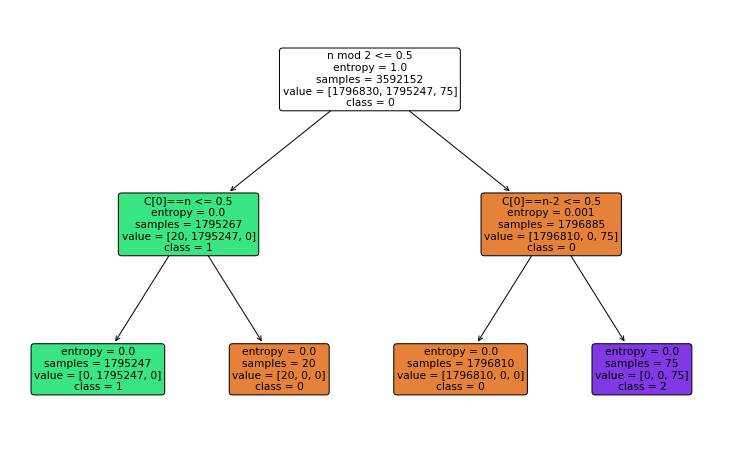

In [197]:
fig,ax=plt.subplots(1,1,figsize=(13,8))
tree.plot_tree(clf,ax=ax,feature_names=X.columns,class_names=["0","1","2"],filled=True,rounded=True)
fig.savefig("tree.png",dpi=300)

In [175]:
mask=(X["C[0]"]<=2) & (X["C[0]==n-2"]) & (X["n mod 2"]==1)

In [176]:
U[mask]

array([[1, 0, 0, 0, 2],
       [1, 0, 1, 1, 0],
       [1, 0, 2, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0]], dtype=int32)

In [177]:
G[mask]

array([0, 2, 0, 2, 0, 0])